

# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project talks about the US arms registration program, is it one of the required competencies, and what are the most important statistics that we came up with.
### Questions that I will answer
- What is the most common type of weapon to buy?
- What are the top 5 states in the growth rate of weapons permit in the last 5 years and who is the state with the highest growth rates?
- What are the states that buy the most weapons?

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

<a id='wrangling'></a>
# Data Wrangling


 ## General Properties

### importing files

In [ ]:
df_Census_Data = pd.read_csv('U.S. Census Data.csv',index_col=0)
df_Gun_Data = pd.read_excel('gun_data.Xlsx')

### Assessing files

#### U.S. Census Data

In [31]:
df_Census_Data.head(10)

,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,7.10%,6.40%,7.80%,6.50%,6.70%,6.60%,7.20%,6.50%,6.90%,5.20%,6.30%,5.60%,6.00%,6.70%,7.10%,6.50%,6.30%,7.20%,6.90%,5.30%,6.20%,0.07,0.06,0.066,0.066,0.062,0.07,0.062,0.057,0.055,0.065,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
"Persons under 18 years, percent, July 1, 2016, (V2016)",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,21.60%,26.00%,22.90%,23.80%,23.30%,24.60%,22.80%,23.80%,19.10%,22.40%,20.20%,22.10%,23.30%,24.10%,22.80%,21.80%,24.80%,23.00%,19.50%,22.20%,0.236,0.212,0.227,0.233,0.225,0.245,0.212,0.209,0.197,0.221,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,25.70%,22.30%,27.40%,24.40%,24.80%,23.90%,25.50%,23

In [32]:
df_Census_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Population estimates, July 1, 2016,  (V2016) to Z
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact Note       28 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 

In [33]:
df_Census_Data.describe()

,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,28,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
unique,15,65,64,64,64,63,64,63,64,64,64,63,63,65,63,65,65,65,65,64,64,65,64,65,65,64,65,65,63,65,65,64,65,65,63,64,64,63,65,64,65,65,64,64,64,63,65,65,64,65,64
top,(c),10.70%,7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,51.10%,6.40%,6.40%,49.90%,86.80%,2.20%,"211,066",34.9,59.10%,"$144,100",1.60%,51.60%,"198,026,611",6.30%,2.49,"89,159",14.00%,22.60%,10.70%,49.90%,"3,796",5.80%,0.025,0.304,0.155,0.145,0.022,0.505,0.038,0.129,0.01,0.275,13791827,0.048,50.40%,2.50%,1.90%,6.10%,4.60%,1.50%,5.80%,7.10%
freq,6,1,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,1,1,2,2,1,2,1,1,2,1,1,2,1,1,2,1,1,2,2,2,2,1,2,1,1,2,2,2,2,1,1,2,1,2


#### Quality_1:
- drop the rows from 66 to the end 
- change the type of the most of the columns to float data type
- drop the fact note 
- drop the "%" and "$" form data to do arithmetic operations
- drop the rows with leters because it is not useful in mathematical operations
#### tidness_1:
- make the first coulmn to the index of the data


#### gun_data

In [34]:
df_Gun_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [35]:
df_Gun_Data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.00000,0.00000,5734.00000,6320.00000,221.00000,317,0.00000,15.00000,21.00000,2.00000,1378.00000,1262.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.00000,16.00000,3.00000,0.00000,0.00000,3.00000,32019
1,2017-09,Alaska,209.00000,2.00000,2320.00000,2930.00000,219.00000,160,0.00000,5.00000,2.00000,0.00000,200.00000,154.00000,2.00000,28.00000,30.00000,0.00000,0.00000,0.00000,17.00000,24.00000,1.00000,0.00000,0.00000,0.00000,6303
2,2017-09,Arizona,5069.00000,382.00000,11063.00000,7946.00000,920.00000,631,0.00000,13.00000,6.00000,0.00000,1474.00000,748.00000,3.00000,82.00000,5.00000,0.00000,0.00000,0.00000,38.00000,12.00000,2.00000,0.00000,0.00000,0.00000,28394
3,2017-09,Arkansas,2935.00000,632.00000,4347.00000,6063.00000,165.00000,366,51.00000,12.00000,13.00000,0.00000,1296.00000,1824.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,13.00000,23.00000,0.00000,0.00000,2.00000,1.00000,17747
4,2017-09,California,57839.00000,0.00000,37165.00000,24581.00000,2984.00000,0,0.00000,0.00000,0.00000,0.00000,535.00000,397.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.00000,NaN,14.00000,2.00000,NaN,8,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.00000,NaN,65.00000,286.00000,NaN,8,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.00000,NaN,149.00000,251.00000,NaN,5,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.00000,NaN,25.00000,214.00000,NaN,2,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


#### Quality_1:
- make month column a datetime data type  

### Data Cleaning 

In [36]:
df=df_Census_Data.copy()
df_gun=df_Gun_Data.copy() 
#make copy to use it in cleaning

#### U.S. Census Data

##### the problem is :  drop the rows from 66 to the end and 'Fact Note	' column

##### the code :

In [37]:
df.drop(df_Census_Data.index[64:],inplace=True)
df.drop('Fact Note',axis=1,inplace=True)

##### try 

In [38]:
df.head(500)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,7.10%,6.40%,7.80%,6.50%,6.70%,6.60%,7.20%,6.50%,6.90%,5.20%,6.30%,5.60%,6.00%,6.70%,7.10%,6.50%,6.30%,7.20%,6.90%,5.30%,6.20%,0.07,0.06,0.066,0.066,0.062,0.07,0.062,0.057,0.055,0.065,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
"Persons under 18 years, percent, July 1, 2016, (V2016)",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,21.60%,26.00%,22.90%,23.80%,23.30%,24.60%,22.80%,23.80%,19.10%,22.40%,20.20%,22.10%,23.30%,24.10%,22.80%,21.80%,24.80%,23.00%,19.50%,22.20%,0.236,0.212,0.227,0.233,0.225,0.245,0.212,0.209,0.197,0.221,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,25.70%,22.30%,27.40%,24.40%,24.80%,23.90%,25.50%,23.60%,24.70%,20.70%,23.40%,21.70%,23.70%,24.

##### the problem is :  drop the "%" and "$" form data and make the data type float to do arithmetic operations


##### the code :

In [39]:
columns=df.columns
for column in columns :
    df[column]=df[column].str.replace("%"," ")
    df[column]=df[column].str.replace("$"," ")
    df[column]=df[column].str.replace("\'"," ")
    df[column]=df[column].str.replace(",","")
    

<ipython-input-39-81d5befad437>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[column]=df[column].str.replace("$"," ")


##### try 

In [40]:
df.head(10)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,1428557,1683140,12801539,6633053,3134693,2907289,4436974,4681666,1331479,6016447,6811779,9928300,5519952,2988726,6093000,1042520,1907116,2940058,1334795,8944469,2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
"Population estimates base, April 1, 2010, (V2016)",4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,1360301,1567650,12831574,6484136,3046869,2853129,4339344,4533479,1328364,5773786,6547813,9884129,5303924,2968103,5988928,989414,1826334,2700691,1316461,8791953,2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70,4.50,8.40,2.50,5.40,10.20,0.10,6.00,9.60,6.40,5.00,7.40,-0.20,2.30,2.90,1.90,2.20,3.30,0.20,4.20,4.00,0.40,4.10,0.70,1.70,5.40,4.40,8.90,1.40,1.70,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80,10.40,-0.20,5.10,8.40,-1.20,1.60,3.90
"Population, Census, April 1, 2010",4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,1360301,1567582,12830632,6483802,3046355,2853118,4339367,4533372,1328361,5773552,6547629,9883640,5303925,2967297,5988927,989415,1826341,2700551,1316470,8791894,2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00,7.30,6.30,6.40,6.30,6.10,5.20,5.80,5.50,6.40,6.40,6.80,6.00,6.40,6.40,6.70,6.20,6.60,4.90,6.10,5.30,5.80,6.40,6.30,6.10,6.00,7.00,6.30,4.80,5.80,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20,8.30,4.90,6.10,6.20,5.50,5.80,6.50
"Persons under 5 years, percent, April 1, 2010",6.40,7.60,7.10,6.80,6.80,6.80,5.70,6.20,5.70,7.10,6.40,7.80,6.50,6.70,6.60,7.20,6.50,6.90,5.20,6.30,5.60,6.00,6.70,7.10,6.50,6.30,7.20,6.90,5.30,6.20,0.07,0.06,0.066,0.066,0.062,0.07,0.062,0.057,0.055,0.065,0.073,0.064,7.70,9.50,5.10,6.40,6.50,5.60,6.30,7.10
"Persons under 18 years, percent, July 1, 2016, (V2016)",22.60,25.20,23.50,23.60,23.20,22.80,21.10,21.50,20.10,24.40,21.60,26.00,22.90,23.80,23.30,24.60,22.80,23.80,19.10,22.40,20.20,22.10,23.30,24.10,22.80,21.80,24.80,23.00,19.50,22.20,0.236,0.212,0.227,0.233,0.225,0.245,0.212,0.209,0.197,0.221,0.246,0.226,26.20,30.20,19.00,22.20,22.40,20.50,22.30,23.70
"Persons under 18 years, percent, April 1, 2010",23.70,26.40,25.50,24.40,25.00,24.40,22.90,22.90,21.30,25.70,22.30,27.40,24.40,24.80,23.90,25.50,23.60,24.70,20.70,23.40,21.70,23.70,24.20,25.50,23.80,22.60,25.10,24.60,21.80,23.50,0.252,0.223,0.239,0.223,0.237,0.248,0.226,0.22,0.213,0.234,0.249,0.236,27.30,31.50,20.70,23.20,23.50,20.90,23.60,24.00
"Persons 65 years and over, percent, July 1, 2016, (V2016)",16.10,10.40,16.90,16.30,13.60,13.40,16.10,17.50,19.90,13.10,17.10,15.10,14.60,14.90,16.40,15.00,15.60,14.40,19.40,14.60,15.80,16.20,15.10,15.10,16.10,17.70,15.00,15.00,17.00,15.30,0.165,0.154,0.155,0.145,0.162,0.15,0.168,0.174,0.165,0.167,0.16,0.157,12.00,10.50,18.10,14.60,14.80,18.80,16.10,15.00


##### the problem is : drop the rows with leters because it is not useful in mathematical operations

##### the code :

In [41]:
x=0
for column in columns :
    df[column]=df[column].replace("Z",np.NaN)
    df[column]=df[column].replace("D",np.NaN)
    df[column]=df[column].replace("F",np.NaN)
    df[column]=df[column].replace("FN",np.NaN)
    df[column]=df[column].replace("NA",np.NaN)
    df[column]=df[column].replace("S",np.NaN)
    df[column]=df[column].replace('X',np.NaN)


##### try 

In [42]:
df.dropna(axis=0,inplace=True)


In [43]:
df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,1428557,1683140,12801539,6633053,3134693,2907289,4436974,4681666,1331479,6016447,6811779,9928300,5519952,2988726,6093000,1042520,1907116,2940058,1334795,8944469,2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
"Population estimates base, April 1, 2010, (V2016)",4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,1360301,1567650,12831574,6484136,3046869,2853129,4339344,4533479,1328364,5773786,6547813,9884129,5303924,2968103,5988928,989414,1826334,2700691,1316461,8791953,2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70,4.50,8.40,2.50,5.40,10.20,0.10,6.00,9.60,6.40,5.00,7.40,-0.20,2.30,2.90,1.90,2.20,3.30,0.20,4.20,4.00,0.40,4.10,0.70,1.70,5.40,4.40,8.90,1.40,1.70,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80,10.40,-0.20,5.10,8.40,-1.20,1.60,3.90
"Population, Census, April 1, 2010",4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,1360301,1567582,12830632,6483802,3046355,2853118,4339367,4533372,1328361,5773552,6547629,9883640,5303925,2967297,5988927,989415,1826341,2700551,1316470,8791894,2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00,7.30,6.30,6.40,6.30,6.10,5.20,5.80,5.50,6.40,6.40,6.80,6.00,6.40,6.40,6.70,6.20,6.60,4.90,6.10,5.30,5.80,6.40,6.30,6.10,6.00,7.00,6.30,4.80,5.80,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20,8.30,4.90,6.10,6.20,5.50,5.80,6.50
"Persons under 5 years, percent, April 1, 2010",6.40,7.60,7.10,6.80,6.80,6.80,5.70,6.20,5.70,7.10,6.40,7.80,6.50,6.70,6.60,7.20,6.50,6.90,5.20,6.30,5.60,6.00,6.70,7.10,6.50,6.30,7.20,6.90,5.30,6.20,0.07,0.06,0.066,0.066,0.062,0.07,0.062,0.057,0.055,0.065,0.073,0.064,7.70,9.50,5.10,6.40,6.50,5.60,6.30,7.10
"Persons under 18 years, percent, July 1, 2016, (V2016)",22.60,25.20,23.50,23.60,23.20,22.80,21.10,21.50,20.10,24.40,21.60,26.00,22.90,23.80,23.30,24.60,22.80,23.80,19.10,22.40,20.20,22.10,23.30,24.10,22.80,21.80,24.80,23.00,19.50,22.20,0.236,0.212,0.227,0.233,0.225,0.245,0.212,0.209,0.197,0.221,0.246,0.226,26.20,30.20,19.00,22.20,22.40,20.50,22.30,23.70
"Persons under 18 years, percent, April 1, 2010",23.70,26.40,25.50,24.40,25.00,24.40,22.90,22.90,21.30,25.70,22.30,27.40,24.40,24.80,23.90,25.50,23.60,24.70,20.70,23.40,21.70,23.70,24.20,25.50,23.80,22.60,25.10,24.60,21.80,23.50,0.252,0.223,0.239,0.223,0.237,0.248,0.226,0.22,0.213,0.234,0.249,0.236,27.30,31.50,20.70,23.20,23.50,20.90,23.60,24.00
"Persons 65 years and over, percent, July 1, 2016, (V2016)",16.10,10.40,16.90,16.30,13.60,13.40,16.10,17.50,19.90,13.10,17.10,15.10,14.60,14.90,16.40,15.00,15.60,14.40,19.40,14.60,15.80,16.20,15.10,15.10,16.10,17.70,15.00,15.00,17.00,15.30,0.165,0.154,0.155,0.145,0.162,0.15,0.168,0.174,0.165,0.167,0.16,0.157,12.00,10.50,18.10,14.60,14.80,18.80,16.10,15.00


##### the problem is : change the type of the most of the columns to float data type

##### the code :

In [44]:
columns
for column in columns :
    df[column]=df[column].astype(float)

##### try 

In [45]:
df.head(10)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4863300.00000,741894.00000,6931071.00000,2988248.00000,39250017.00000,5540545.00000,3576452.00000,952065.00000,20612439.00000,10310371.00000,1428557.00000,1683140.00000,12801539.00000,6633053.00000,3134693.00000,2907289.00000,4436974.00000,4681666.00000,1331479.00000,6016447.00000,6811779.00000,9928300.00000,5519952.00000,2988726.00000,6093000.00000,1042520.00000,1907116.00000,2940058.00000,1334795.00000,8944469.00000,2081015.00000,19745289.00000,10146788.00000,757952.00000,11614373.00000,3923561.00000,4093465.00000,12784227.00000,1056426.00000,4961119.00000,865454.00000,6651194.00000,27862596.00000,3051217.00000,624594.00000,8411808.00000,7288000.00000,1831102.00000,5778708.00000,585501.00000
"Population estimates base, April 1, 2010, (V2016)",4780131.00000,710249.00000,6392301.00000,2916025.00000,37254522.00000,5029324.00000,3574114.00000,897936.00000,18804592.00000,9688680.00000,1360301.00000,1567650.00000,12831574.00000,6484136.00000,3046869.00000,2853129.00000,4339344.00000,4533479.00000,1328364.00000,5773786.00000,6547813.00000,9884129.00000,5303924.00000,2968103.00000,5988928.00000,989414.00000,1826334.00000,2700691.00000,1316461.00000,8791953.00000,2059198.00000,19378110.00000,9535688.00000,672591.00000,11536727.00000,3751615.00000,3831072.00000,12702857.00000,1052940.00000,4625410.00000,814195.00000,6346298.00000,25146100.00000,2763888.00000,625741.00000,8001041.00000,6724545.00000,1853011.00000,5687289.00000,563767.00000
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70000,4.50000,8.40000,2.50000,5.40000,10.20000,0.10000,6.00000,9.60000,6.40000,5.00000,7.40000,-0.20000,2.30000,2.90000,1.90000,2.20000,3.30000,0.20000,4.20000,4.00000,0.40000,4.10000,0.70000,1.70000,5.40000,4.40000,8.90000,1.40000,1.70000,0.01100,0.01900,0.06400,0.12700,0.00700,0.04600,0.06800,0.00600,0.00300,0.07300,0.06300,0.04800,10.80000,10.40000,-0.20000,5.10000,8.40000,-1.20000,1.60000,3.90000
"Population, Census, April 1, 2010",4779736.00000,710231.00000,6392017.00000,2915918.00000,37253956.00000,5029196.00000,3574097.00000,897934.00000,18801310.00000,9687653.00000,1360301.00000,1567582.00000,12830632.00000,6483802.00000,3046355.00000,2853118.00000,4339367.00000,4533372.00000,1328361.00000,5773552.00000,6547629.00000,9883640.00000,5303925.00000,2967297.00000,5988927.00000,989415.00000,1826341.00000,2700551.00000,1316470.00000,8791894.00000,2059179.00000,19378102.00000,9535483.00000,672591.00000,11536504.00000,3751351.00000,3831074.00000,12702379.00000,1052567.00000,4625364.00000,814180.00000,6346105.00000,25145561.00000,2763885.00000,625741.00000,8001024.00000,6724540.00000,1852994.00000,5686986.00000,563626.00000
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00000,7.30000,6.30000,6.40000,6.30000,6.10000,5.20000,5.80000,5.50000,6.40000,6.40000,6.80000,6.00000,6.40000,6.40000,6.70000,6.20000,6.60000,4.90000,6.10000,5.30000,5.80000,6.40000,6.30000,6.10000,6.00000,7.00000,6.30000,4.80000,5.80000,0.06200,0.05900,0.06000,0.07300,0.06000,0.06800,0.05800,0.05600,0.05200,0.05900,0.07100,0.06100,7.20000,8.30000,4.90000,6.10000,6.20000,5.50000,5.80000,6.50000
"Persons under 5 years, percent, April 1, 2010",6.40000,7.60000,7.10000,6.80000,6.80000,6.80000,5.70000,6.20000,5.70000,7.10000,6.40000,7.80000,6.50000,6.70000,6.60000,7.20000,6.50000,6.90000,5.20000,6.30000,5.60000,6.00000,6.70000,7.10000,6.50000,6.30000,7.20000,6.90000,5.30000,6.2000

##### gun_data

##### the problem is : the 'month' is not in datetime type

##### the code :

In [46]:

df_gun['month']=pd.to_datetime(df_gun['month'])

##### try 

In [47]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

<a id='eda'></a>
## Exploratory Data Analysis
### What is the most common type of weapon to buy?

In [48]:
df_gun.sum()

state                        AlabamaAlaskaArizonaArkansasCaliforniaColorado...
permit                                                              79920236.0
permit_recheck                                                       1282552.0
handgun                                                             74053083.0
long_gun                                                            97370026.0
other                                                                1982594.0
multiple                                                               3353513
admin                                                                 733988.0
prepawn_handgun                                                        50897.0
prepawn_long_gun                                                       82572.0
prepawn_other                                                            847.0
redemption_handgun                                                   4302048.0
redemption_long_gun                                 

 ####  --It is clear from the displayed statistics that the most weapon buy is the long_gun

### What are the top 5 states in the growth rate of weapons permit in the last 5 years and who is the state with the highest growth rates?

In [49]:
permit=df_gun.pivot(index='month', columns='state',values='permit')
permit=permit.reset_index()
permit=permit[158:]
permit.head(10)

state,month,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Mariana Islands,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
158,2012-01-01,518.00000,0.00000,2946.00000,2372.00000,23099.00000,2815.00000,9009.00000,0.00000,0.00000,4.00000,10964.00000,0.00000,1057.00000,2503.00000,64346.00000,5044.00000,10390.00000,1688.00000,178454.00000,0.00000,0.00000,0.00000,1.00000,7171.00000,19146.00000,12424.00000,525.00000,2910.00000,998.00000,3996.00000,1343.00000,2323.00000,0.00000,425.00000,2703.00000,19968.00000,642.00000,0.00000,0.00000,45.00000,257.00000,0.00000,0.00000,5424.00000,0.00000,3810.00000,10360.00000,5689.00000,0.00000,2.00000,0.00000,9621.00000,257.00000,22425.00000,302.00000
159,2012-02-01,573.00000,0.00000,3002.00000,2742.00000,25314.00000,2752.00000,9696.00000,0.00000,0.00000,0.00000,11666.00000,0.00000,1257.00000,2264.00000,55426.00000,9076.00000,11797.00000,1311.00000,180668.00000,0.00000,0.00000,0.00000,39.00000,8308.00000,24751.00000,14201.00000,545.00000,3485.00000,1207.00000,4458.00000,1809.00000,2630.00000,0.00000,754.00000,2765.00000,24362.00000,1169.00000,0.00000,0.00000,35.00000,239.00000,0.00000,0.00000,5497.00000,0.00000,5111.00000,13453.00000,7682.00000,0.00000,0.00000,0.00000,10962.00000,148.00000,16860.00000,288.00000
160,2012-03-01,596.00000,0.00000,6413.00000,3302.00000,31724.00000,4787.00000,11431.00000,0.00000,0.00000,0.00000,11662.00000,0.00000,1547.00000,2808.00000,72936.00000,12257.00000,10534.00000,1203.00000,185109.00000,0.00000,0.00000,0.00000,8.00000,9842.00000,24910.00000,18431.00000,493.00000,4623.00000,1379.00000,4354.00000,1672.00000,2824.00000,0.00000,611.00000,2886.00000,22750.00000,1745.00000,0.00000,0.00000,65.00000,280.00000,0.00000,0.00000,6909.00000,0.00000,5440.00000,21989.00000,10779.00000,0.00000,0.00000,0.00000,12738.00000,385.00000,14127.00000,424.00000
161,2012-04-01,476.00000,0.00000,3894.00000,3680.00000,29961.00000,4742.00000,10471.00000,0.00000,0.00000,0.00000,8422.00000,0.00000,1599.00000,2827.00000,67212.00000,11986.00000,8134.00000,1358.00000,186399.00000,0.00000,0.00000,0.00000,20.00000,8687.00000,20773.00000,16217.00000,399.00000,4017.00000,1124.00000,3372.00000,2459.00000,2663.00000,0.00000,592.00000,3046.00000,16909.00000,1404.00000,0.00000,0.00000,26.00000,235.00000,0.00000,0.00000,5724.00000,0.00000,6058.00000,12043.00000,11153.00000,0.00000,0.00000,0.00000,12297.00000,280.00000,13383.00000,372.00000
162,2012-05-01,396.00000,0.00000,5088.00000,1841.00000,28299.00000,3477.00000,10556.00000,0.00000,0.00000,0.00000,9078.00000,0.00000,1408.00000,2702.00000,55892.00000,9028.00000,7411.00000,1865.00000,187970.00000,0.00000,0.00000,0.00000,1.00000,9453.00000,19157.00000,15548.00000,426.00000,3459.00000,936.00000,2911.00000,1669.00000,2371.00000,0.00000,662.00000,3325.00000,17474.00000,1959.00000,0.00000,0.00000,18.00000,261.00000,0.00000,0.00000,7959.00000,0.00000,6391.00000,13009.00000,10927.00000,0.00000,0.00000,0.00000,10892.00000,369.00000,10437.00000,355.00000
163,2012-06-01,414.00000,0.00000,5808.00000,1939.00000,30722.00000,2561.00000,9575.00000,0.00000,0.00000,0.00000,7298.00000,0.00000,1260.00000,1985.00000,52870.00000,4834.00000,5136.00000,1588.00000,190681.00000,0.00000,0.00000,0.00000,0.00000,8784.00000,16666.00000,12162.00000,350.00000,2889.00000,933.00000,2496.00000,1251.00000,3636.00000,0.00000,698.00000,2348.00000,14120.00000,1661.00000,0.00000,0.00000,23.00000,295.00000,0.00000,0.00000,9447.00000,0.00000,7456.00000,12168.00000,11577.00000,0.00000,0.00000,0.00000,10442.00000,184.00000,7207.00000,309.00000
164,2012-07-01,476.00000,23.

In [50]:
columns=permit.columns
columns=columns[1:]
top=[]#the top states growth
All={}#all states growth
for column in columns: 
    if permit[column][158]!=0:
        growth_rate=(pow((permit[column][226]/permit[column][158]),1/len(permit['month']))-1)*100
        All.update({column : growth_rate })    

In [51]:
sorted(All, key=All.get, reverse=True)[:5]#get the top 5

['Florida', 'Maryland', 'Pennsylvania', 'Oregon', 'Alabama']

#### the top 5 states:
[Florida, Maryland, Pennsylvania, Oregon, Alabama]

In [52]:
sorted(All, key=All.get, reverse=True)[:1]# get the top one

['Florida']

#### the top one :
[Florida]

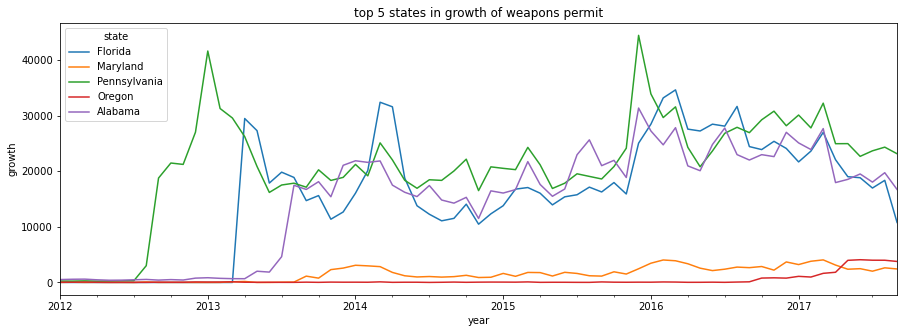

In [53]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
permit.plot(x ='month', y=['Florida', 'Maryland', 'Pennsylvania', 'Oregon', 'Alabama'], kind = 'line',figsize=(15,5));
plt.ylabel('growth')
plt.xlabel('year')
plt.title('top 5 states in growth of weapons permit');

By looking at the graph and calculating the rate of growth, it becomes clear that the most state in the growth rates of weapons registration is Florida although it is not one of the most states owning weapons

### What are the states that buy the most weapons? 

In [54]:
totals=df_gun.pivot(index='month', columns='state',values='totals')

In [55]:
List=[]# list of the state value
state=[] # list of the state names
for column in columns:
    print(column+':',totals[column].sum(axis=0))
    List.append(totals[column].sum(axis=0))
    state.append(column)

Alabama: 6706079
Alaska: 1137643
Arizona: 4425714
Arkansas: 3752633
California: 19014063
Colorado: 6058482
Connecticut: 3168126
Delaware: 491369
District of Columbia: 5601
Florida: 11695777
Georgia: 7209942
Guam: 14997
Hawaii: 197580
Idaho: 1968134
Illinois: 15471534
Indiana: 7737172
Iowa: 2297156
Kansas: 2624669
Kentucky: 29762434
Louisiana: 4705057
Maine: 1257457
Mariana Islands: 462
Maryland: 2035652
Massachusetts: 2571321
Michigan: 7254279
Minnesota: 6279271
Mississippi: 3576312
Missouri: 6549018
Montana: 1884124
Nebraska: 1136209
Nevada: 1731797
New Hampshire: 1583148
New Jersey: 1145846
New Mexico: 2076591
New York: 4643828
North Carolina: 7777689
North Dakota: 947440
Ohio: 8462744
Oklahoma: 4584454
Oregon: 3751061
Pennsylvania: 13133876
Puerto Rico: 194464
Rhode Island: 288870
South Carolina: 4014432
South Dakota: 1215712
Tennessee: 7311293
Texas: 19435186
Utah: 4338273
Vermont: 484447
Virgin Islands: 15108
Virginia: 5878675
Washington: 6384517
West Virginia: 3208889
Wisconsin: 

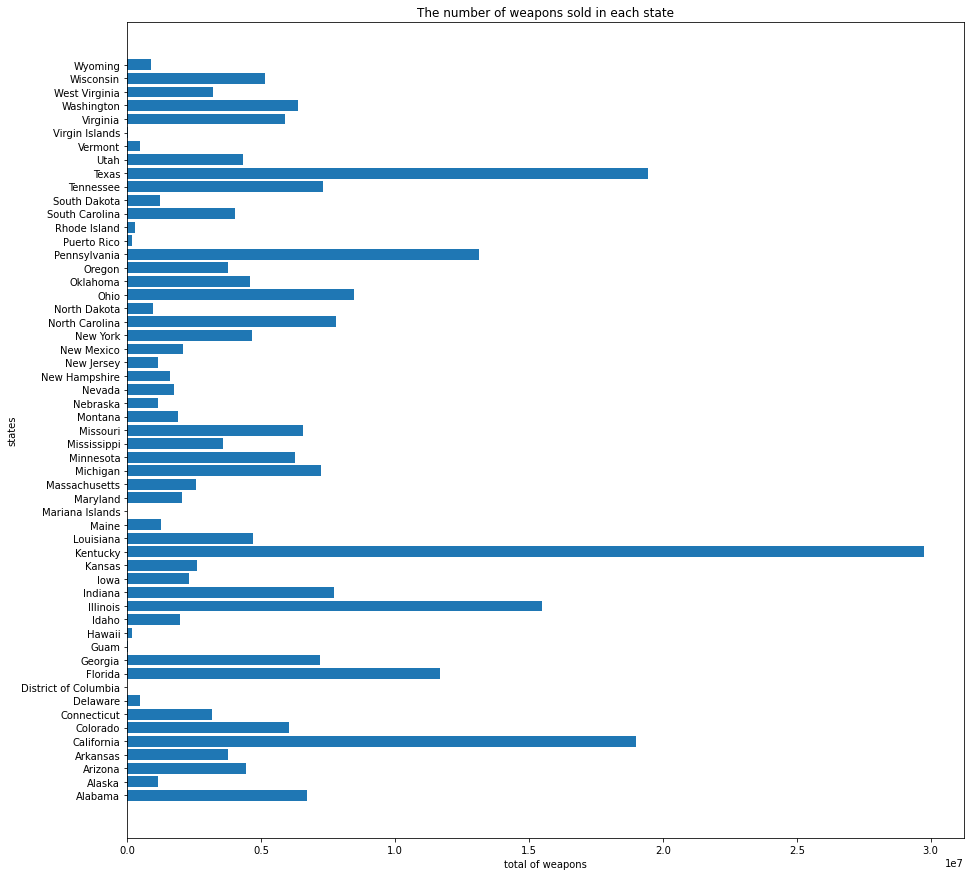

In [56]:
plt.subplots(figsize=(15, 15))
plt.barh(state,List);
plt.ylabel('states')
plt.xlabel('total of weapons')
plt.title('The number of weapons sold in each state');

<a id='conclusions'></a>
## Conclusions


### Results
By looking at the chart, we conclude that there is an increase in the purchase of weapons commensurate with the increase in the registration of weapons, and this indicates that the system is working with good efficiency, but needs improvement due to the fact that the states that own the most weapons are not the most registered ones, and we will notice that most years of purchase registration The years were the most tense in America and the state that buys the most guns is Kentucky

### Problems and limits
During the analysis of the data, I faced many problems and difficulties, the most important of which were
- The way the data was done was unstructured
- Difficulty linking the data in the census data with the weapons purchase data
- The inconsistency between the dates of recording the census data and the weapons purchase data
- The inability to answer some questions such as: Does being from a specific race pay more to buy weapons than other races, and is the reason because you do not feel safe? Does the fact that you live in areas where possessing weapons a lot pays to own weapons. .